In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams.update({'font.size':20})
#plt.rcParams["font.family"] = "sans"


import matplotlib.pyplot as plt

# Load the data

In [2]:
cab = pd.read_csv('cab_Data.csv')
cus = pd.read_csv('data_Customer_ID.csv')
city = pd.read_csv('data_City.csv')
Tran = pd.read_csv('data_Transaction_ID.csv')

In [3]:
cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


# Data cleaning 

In [4]:
#merge all files together
df_merge = cab.merge(Tran, on = 'Transaction ID')
df_merge = df_merge.merge(cus, on = 'Customer ID')
df_merge

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,38520,Card,Female,42,19417
359388,10439799,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,12490,Cash,Male,33,18713
359389,10439838,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card,Male,38,3960
359390,10439840,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash,Male,23,19454


In [5]:
city.info()
#the city file does not have any common column with other columns 
#population and users are object and not integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [6]:

#city # need to remove the ',' from the users and population 

city['Population'] = city['Population'].str.replace(",", "").astype(int)
city['Users'] = city['Users'].str.replace(",", "").astype(int)
city

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [7]:
#creat a master Data by combining files
master = df_merge.merge(city, on = 'City')
master

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001


In [8]:
#we need to convert the date format to real time format
import math
import datetime


def xldate_to_datetime(xldatetime): #this function converts the times in excel format to the right times 

    tempDate = datetime.datetime(1899, 12, 30)
    (days, portion) = math.modf(xldatetime)
    
    deltaDays = datetime.timedelta(days=days)
#changing the variable name in the edit
    secs = int(24 * 60 * 60 * portion)
    detlaSeconds = datetime.timedelta(seconds=secs)
    TheTime = (tempDate + deltaDays + detlaSeconds )
    return TheTime.strftime("%Y-%m-%d %H:%M:%S")

cab['Date of Travel'] = [xldate_to_datetime(x) for x in cab['Date of Travel']]
cab['Date of Travel'].max(),cab['Date of Travel'].min() #the time period of dataset

('2018-12-31 00:00:00', '2016-01-02 00:00:00')

# Exploratory Data analysis

In [9]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  int64  
 13  Users               359392 non-null  int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 41.1+ MB


In [10]:
#null values
master.isnull().sum()
#there is no missing values in any of the dataset

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

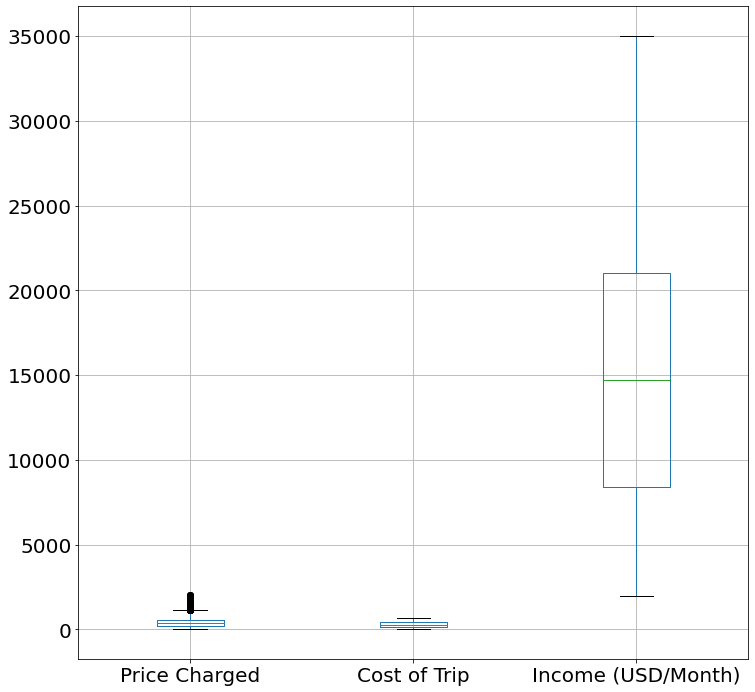

In [11]:
#find out Outliers
plt.figure(figsize=(12,12))

boxplot = master.boxplot(column=['Price Charged', 'Cost of Trip', 'Income (USD/Month)'])
plt.show()
#there is not real outlier in the dataset

In [12]:
#find duplicates in Data
#df_merge.duplicated(subset=None, keep='first')
duplicateRowsDF = master[master.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

#there is nothing

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Transaction ID, Date of Travel, Company, City, KM Travelled, Price Charged, Cost of Trip, Customer ID, Payment_Mode, Gender, Age, Income (USD/Month), Population, Users]
Index: []


In [13]:
master.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701


In [14]:
#find out mean-max-min in the data
describeNum =master.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.000000,10220761.185363,126805.803715,10000011.000000,10110809.750000,10221035.500000,10330937.250000,10440107.000000
Date of Travel,359392.000000,42964.067998,307.467197,42371.000000,42697.000000,42988.000000,43232.000000,43465.000000
KM Travelled,359392.000000,22.567254,12.233526,1.900000,12.000000,22.440000,32.960000,48.000000
Price Charged,359392.000000,423.443311,274.378911,15.600000,206.437500,386.360000,583.660000,2048.030000
Cost of Trip,359392.000000,286.190113,157.993661,19.000000,151.200000,282.480000,413.683200,691.200000
Customer ID,359392.000000,19191.652115,21012.412463,1.000000,2705.000000,7459.000000,36078.000000,60000.000000
Age,359392.000000,35.336705,12.594234,18.000000,25.000000,33.000000,42.000000,65.000000
Income (USD/Month),359392.000000,15048.822937,7969.409482,2000.000000,8424.000000,14685.000000,21035.000000,35000.000000
Population,359392.000000,3132198.044127,3315194.391534,248968.000000,671238.000000,1595037.000000,8405837.000000,8405837.000000
Users,359392.000000,158365.582267,100850.051020,3643.000000,80021.000000,144132.000000,302149.000000,302149.000000


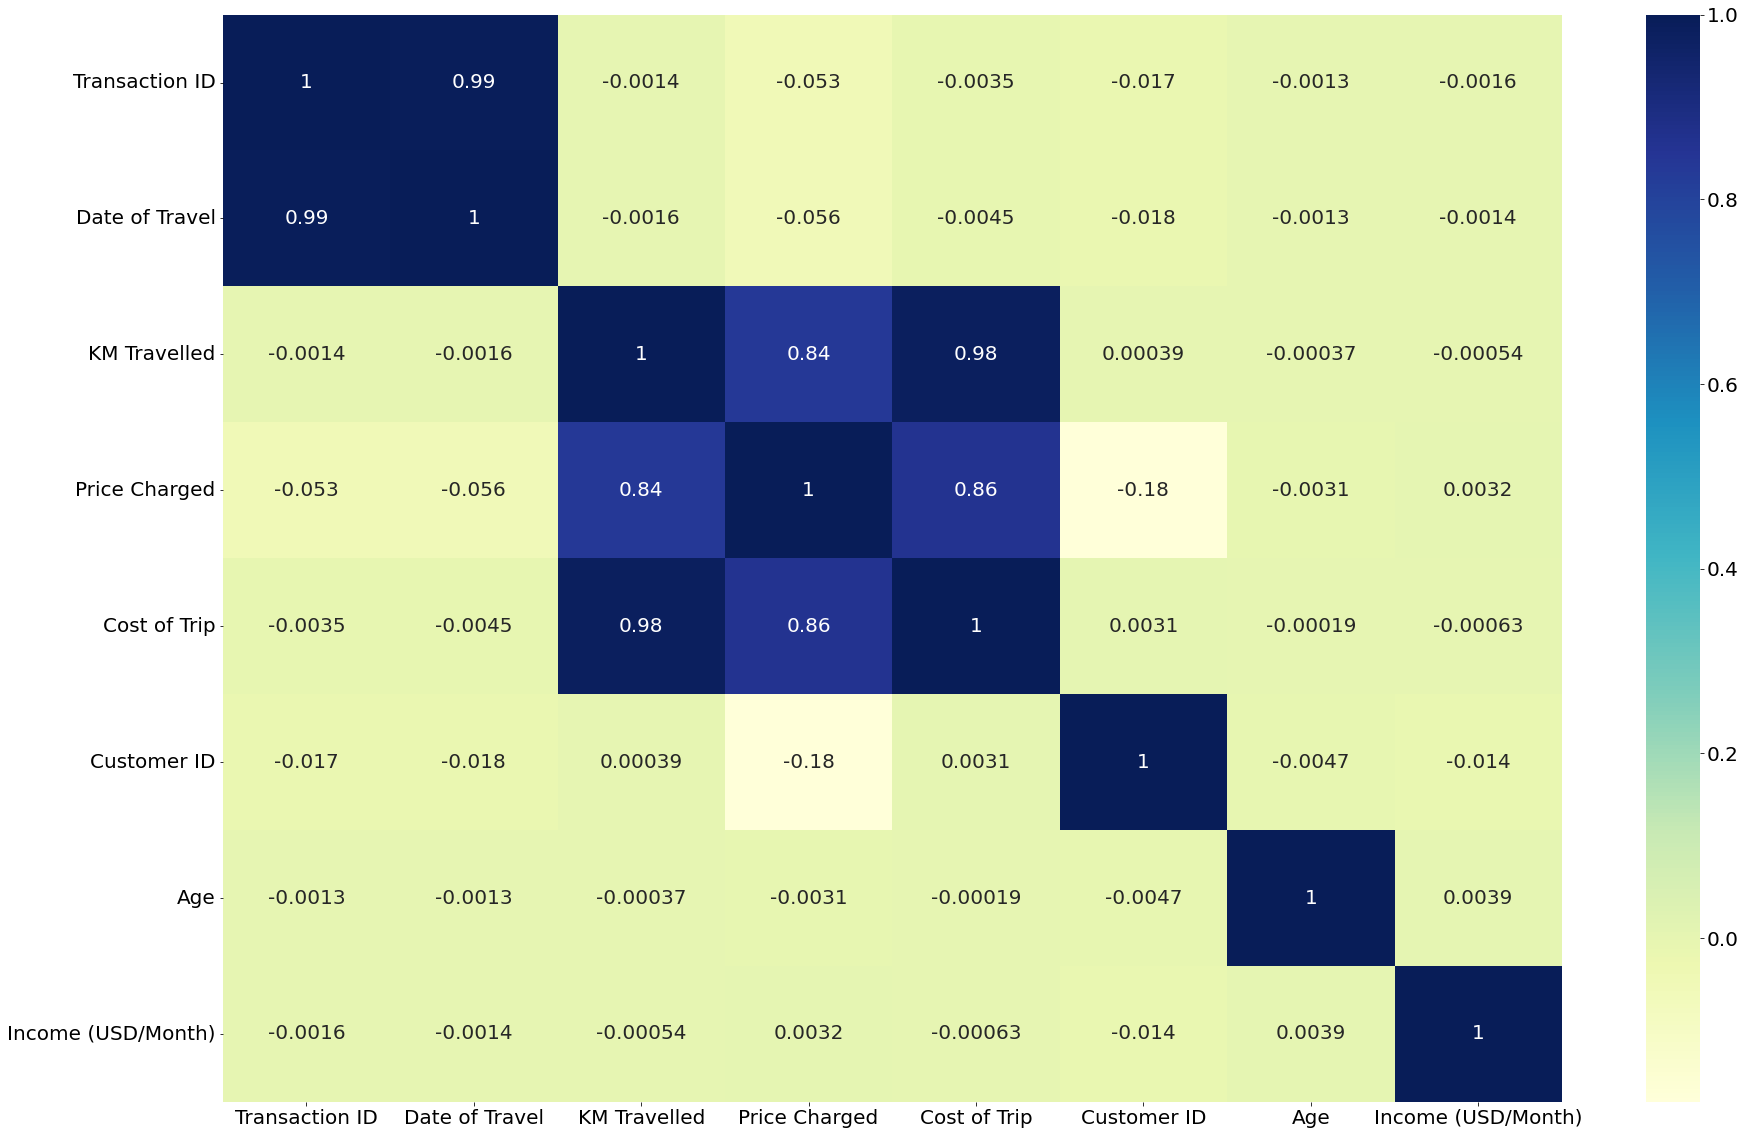

In [15]:
#find out correlation in the data 

plt.figure(figsize=(30,20))
ax = sns.heatmap(data = df_merge.corr(),cmap='YlGnBu',annot=True)

bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5,top - 0.5)
#Km travelled, price charged and cost of trip has the highest correlation between each other(obvious fact)
#Price charged has a  correlation with Population
#the number of users are higher in cities that has higher population (obvious fact)

In [16]:
#What is the business problem?
#To know which Cab industry- Pink or yelllow has highest Profit or more number of customers
#

#What are the properties of the data provided (data intake report)
#What steps did you take in order to create an applicable data set?
#How did you prepare and perform your analysis?
#What type of analysis did you perform?
#Why did you choose to use certain analytical techniques over others?
#What were the results?


# Which company has the higher number of Users ? 




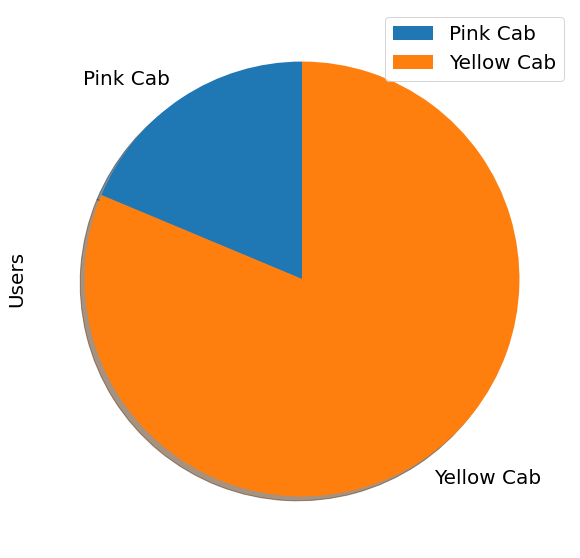

In [17]:
#In general
master.groupby(['Company']).sum().plot(kind='pie', y='Users', subplots=True, shadow = True,startangle=90,figsize=(12,10))
plt.show()
#the Yellow Company has the higher number of users based on the Chart 

In [ ]:
#Investigate number of users over a time Period 

# Which Company has higher Profit ? 


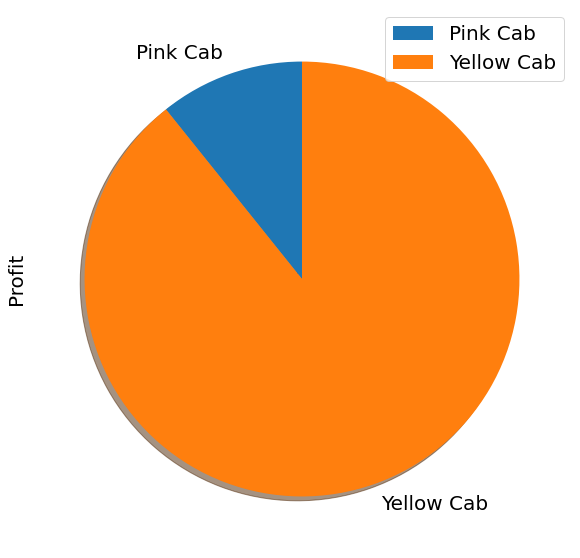

In [18]:
Profit = master['Price Charged'] - master['Cost of Trip']
#print(master.columns)
idx = 4
master.insert(loc = idx, column='Profit',value=Profit)
master.groupby(['Company']).sum().plot(kind='pie', y='Profit', subplots=True, shadow = True,startangle=90,figsize=(12,10))
plt.show()
#yellow cab has higher Profit compared to the Pink Cab in general





In [ ]:
Still working on this exercise.